In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Advection equation

Here we will explore the properties of different numerical methods for solving the linear advection equation:

$\frac{\partial f}{\partial t} = -c \frac{\partial f}{\partial x}$.

We will explore the Forward-in-time Centered-in-space (FTCS), Lax-Friedrichs (L-F) and Centered-in-time Centered-in-space (CTCS) methods that we covered in class.

The goals of this notebook are the following:
1. Learning to implement a numerical solver for an initial value PDE problem (particular the linear advection problem)
2. Learning to verify numerical convergence of your solutions.
2. Study the numerical properties of these methods and compare with numerical analysis techniques we introduced in class. E.g. Are they stable or unstable? How are my solutions distorted by the numerical method (due to numerical dispersion)?

### Lax-Friedrichs (FTCS) method

Repeat instructions but substitute FTCS with the Lax-Friedrichs method.

We will start by focusing on the FTCS method.

a) Start by writing out the FTCS method (in the notebook) for the advection equation. Assume that your spatial domain is discretized into $x_j = j \Delta x$ with $j = 0, 1, 2, ..., M-1$, where $M$ is the number of grid points and  $\Delta x = L/M$, where L is the physical size of your domain. Consider periodic boundary conditions: $f(x_M) = f(x_0)$, equivalent to $f_M = f_0$. Time is discretized in steps of size $\Delta t$.


<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

Our one-dimensional advection equation given by:

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

where $u(x, t)$ is the wave function, $c$ is the wave speed, $x$ is the spatial coordinate, and $t$ is time.

The method involves discretizing time and space into a grid where $u_j^n$ represents the numerical approximation to $u(x, t)$ at the spatial position $x_j = j \Delta x$ and time $t^n = n \Delta t$.

The Lax-Friedrichs scheme can be derived as follows:

1. Start with the average of the forward and backward Euler steps:
$$
u_j^{n+\frac{1}{2}} = \frac{1}{2}(u_{j+1}^n + u_{j-1}^n) - \frac{c \Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n)
$$

2. Then, advance the half step to a full step using the central point $u_j^n$:
$$
u_j^{n+1} = u_j^n - \frac{c \Delta t}{\Delta x}(u_j^{n+\frac{1}{2}} - u_j^{n-\frac{1}{2}})
$$

3. Combine the two steps and simplify to get the Lax-Friedrichs update formula:
$$
u_j^{n+1} = \frac{1}{2}(u_{j+1}^n + u_{j-1}^n) - \frac{c \Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n)
$$

This formula provides a way to compute $u_j^{n+1}$, the value at the next time step, using the values at the currenand adjacent spatial points.

    
</div>

b) You will now implement an FTCS routine in python that updates $f(x_j, t_n) = f_j^n$ to value at the next time step $f(x_j, t_{n+1}) = f_j^{n+1}$. You will represent $f^n$ and $f^{n+1}$ as 1-d arrays of length $M$, containing the values of $f$ at each point $x_j = j\Delta x$, with $j=0, ..., M-1$. Write a routine that takes in as arguments the $f^{n}$ and $f^{n+1}$ arrays (the current and future $f$ arrays), the spatial and temporal steps ($\Delta x$ and $\Delta t$) and calculates $f^{n+1}$. Treat the interior points and boundary points separately. You can use the skeleton routine below as a starting point.

In [13]:
def LaxF_advection(f_np1, f_n, dx, dt):
    """
    This routine uses the Lax-Friedrichs method to calculate f_np1 (f at time n+1) given f_n (f at time n)
    and spatial and temporal steps dx and dt.
    This method assumes periodic boundary conditions.
    The advection speed is set to c=1.
    We assume here that space is measured in units of meters and time in seconds => c is in units of m/s).
    """
    
    c = 1  # Advection speed
    M = len(f_np1)
    
    # update interior points
    for j in range(1, M-1):
        f_np1[j] = 0.5 * (f_n[j+1] + f_n[j-1]) - (c * dt / (2 * dx)) * (f_n[j+1] - f_n[j-1])

    # update boundary points with periodic boundary conditions
    f_np1[0] = 0.5 * (f_n[1] + f_n[M-1]) - (c * dt / (2 * dx)) * (f_n[1] - f_n[M-1])
    f_np1[M - 1] = 0.5 * (f_n[0] + f_n[M - 2]) - (c * dt / (2 * dx)) * (f_n[0] - f_n[M - 2])
    
    return f_np1

c) Now let's get ready to test the method. Let us choose a domain size L. Choose L = 10m. Initialize an array called $x$ (of size $M$), representing the discrete positions of your grid. Initialize $f_n$ and $f_{n+1}$ as 1-d arrays of size $M$ with all values set to zero.

In [38]:
L = 10.0  # physical size of the domain (in m)
M = 100  # number of spatial grid points

dx = L / M  # spatial step size
dt = 0.5 * dx  # temporal step size (as per part e)

x = np.linspace(0, L, M)  # x-coordinates of grid points

# initializing f_n and f_np1 arrays and setting them to zero
f_n = np.zeros(M)
f_np1 = np.zeros(M)

d) We now need to define the initial condition $f(t=0,x) = f^0$. Initialize a gaussian initial condition (with peak amplitude 1). For instance, choose a gaussian pulse centered at $x_0 = 4$, and $\sigma = 0.5$. Plot the solution to verify that the gaussian is where you expect it to be -- Don't forget to add axes labels. 

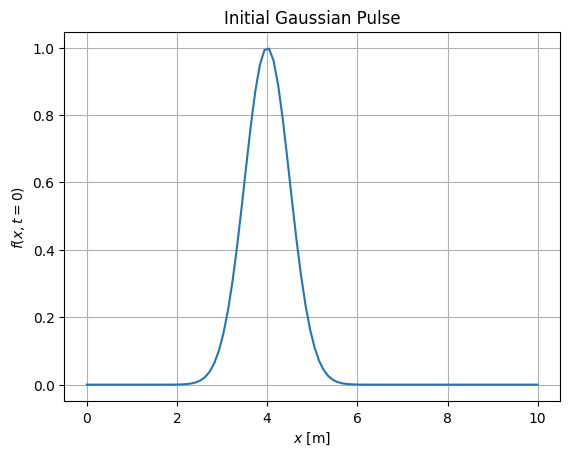

In [32]:
import matplotlib.pyplot as plt

def gaussian_IC(x, x0, sigma):
    """
    Gaussian initial condition.
    """
    return np.exp(-((x - x0)**2) / (2 * sigma**2))

# Initialize the Gaussian initial condition
f_0 = gaussian_IC(x=x, x0=4, sigma=0.5)

# Plot the initial condition
plt.plot(x, f_0)
plt.xlabel('$x$ [m]')
plt.ylabel('$f(x,t=0)$')
plt.title('Initial Gaussian Pulse')
plt.grid(True)
plt.show()

e) Examine the evolution of the solution as a function of time. Choose dt = 0.5*dx, and simulate for a total time T = 4. Does the solution look as you expect?

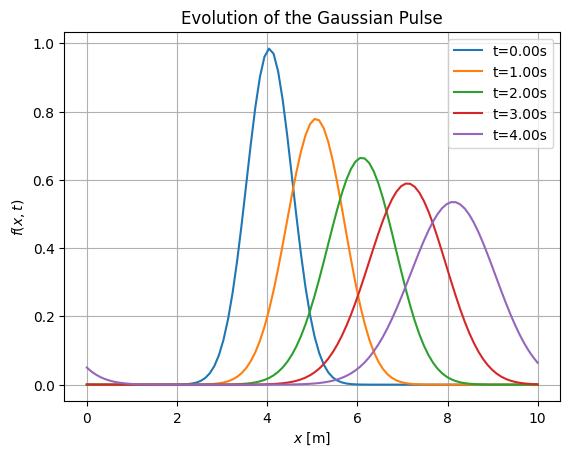

In [39]:
# Assume dx and dt are already defined from the earlier parts
T = 4.0  # total time for simulation
N_t = int(T / dt)  # number of time steps

# Initialize the solution with the initial condition
f_n[:] = f_0

for n in range(N_t + 1):
    # Update the solution
    LaxF_advection(f_np1, f_n, dx, dt)
    
    # Swap the arrays for the next step
    f_n, f_np1 = f_np1, f_n

    if n % (N_t // 4) == 0 or n == N_t:  
        plt.plot(x, f_n, label=f't={n*dt:.2f}s')

plt.xlabel('$x$ [m]')
plt.ylabel('$f(x,t)$')
plt.title('Evolution of the Gaussian Pulse')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

With LaxF we see amplitude decay as the simulation runs as well as a broadening of the wave pulse. The simulated wave form also moves faster than it should. 
    
</div>

f) Test numerical convergence. Progressively lower the time step by factors of 2. Plot the final solution at time $t = 4$ for different the different values of dt. Is it converging to the solution you expect? Overlay the numerical solutions at $t= 4$ with the analytical solution you expect at $t=4$.

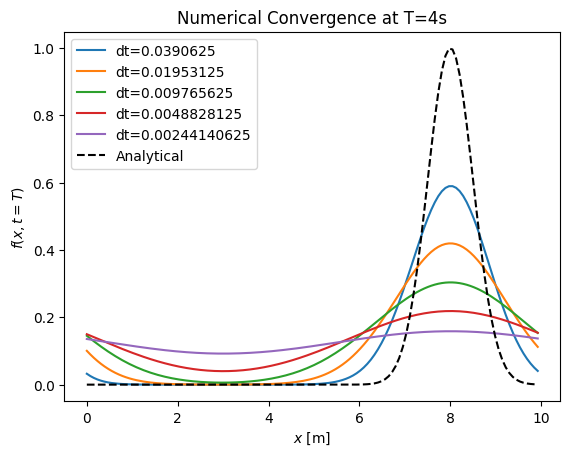

In [46]:
# Define different time steps
time_steps = [dx * 0.5, dx * 0.5/2, dx * 0.5/4, dx * 0.5/8, dx * 0.5/16]

# Store solutions for each dt
solutions = []

for dt in time_steps:
    N_t = int(T / dt)
    f_n = gaussian_IC(x=x, x0=4, sigma=0.5)
    f_np1 = np.zeros(M)

    for n in range(N_t):
        LaxF_advection(f_np1, f_n, dx, dt)
        f_n, f_np1 = f_np1, f_n

    # Store the solution
    solutions.append(f_n)

# Plot the solutions
for i, solution in enumerate(solutions):
    plt.plot(x, solution, label=f'dt={time_steps[i]}')

# Overlay the analytical solution
c = 1  # Advection speed
x_shifted = (x - c * T)
f_analytical = gaussian_IC(x=x_shifted, x0=4, sigma=0.5)
plt.plot(x, f_analytical, 'k--', label='Analytical')

plt.xlabel('$x$ [m]')
plt.ylabel('$f(x,t=T)$')
plt.title('Numerical Convergence at T=4s')
plt.legend()
plt.show()

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

Rather than converging toward the analytical solution the wave dies out as dt is reduced and error increases. While LaxF is conditionaly stable, but achieves stability at the cost of numerical diffusion.
    
</div>

g) Let us define the error between the numerical solution $\hat{f}(t=4)$ and the analytical soltution $f(t=4)$ as:
$\epsilon = \frac{1}{M}\sum_{j=0,M-1}{[f(t=4, x_j)-\hat{f}(t=4, x_j)]^2}$.

Plot the error the $\epsilon$ for different values of $dt$ (use a log-log plot). At what values of $dt$ do you see $\epsilon<10^{-3}$?

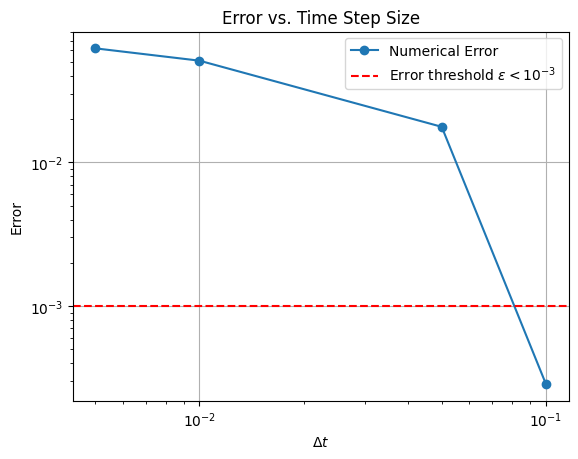

In [34]:
# Parameter Block (all together for ref)
L = 10.0
M = 100
x0 = 4
sigma = 0.5
c = 1
T = 4.0

dx = L / M
x = np.linspace(0, L, M)

# Define dt values to test
dt_values = np.array([1, 0.5, 0.1, 0.05]) * dx

# Initialize an array to store the error for each dt
errors = np.zeros_like(dt_values)

# Loop over dt values
for i, dt in enumerate(dt_values):
    N_t = int(T / dt)  # Number of time steps for the current dt
    f_n = gaussian_IC(x=x, x0=x0, sigma=sigma)
    f_np1 = np.zeros_like(f_n)

    # Time-stepping loop
    for n in range(N_t):
        LaxF_advection(f_np1, f_n, dx, dt)
        f_n, f_np1 = f_np1, f_n

    # Calculate the analytical solution
    f_ana = gaussian_IC(x, x0 + c * T, sigma)

    # Calculate the error
    errors[i] = (np.sum((f_n - f_ana)**2)) / M

# Plotting the error
plt.figure()
plt.loglog(dt_values, errors, marker='o', label='Numerical Error')
plt.axhline(y=1e-3, color='r', linestyle='--', label='Error threshold $\epsilon < 10^{-3}$')
plt.xlabel('$\Delta t$')
plt.ylabel('Error')
plt.title('Error vs. Time Step Size')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

Error increases for smaller time steps dt.
    
</div>

h) Suppose you were interested in integrating the advection equation for twice as long, i.e. up to t = 8s. What dt would you require in order to achieve numerical convergence of your solution? Is it larger or smaller than the dt required for convergence at t=4s?

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

The above suggests that decreasing dt would not bring numerical convergence. 

</div>


i) What about varying dx? Compare the solution at $t=4s$ using $\Delta x = 10/128$ and $\Delta x = 10/256$; keep $c\Delta t/\Delta x = 0.5$ fixed. Do you see convergence of the result with decreasing $\Delta x$?

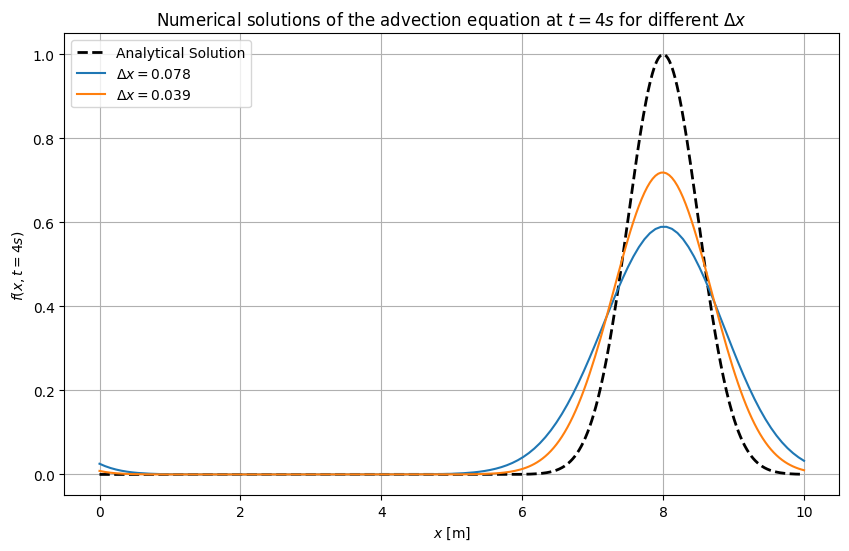

In [20]:
# Parameters
L = 10.0       # Length of the domain
c = 1          # Wave speed
T = 4.0        # Total time
x0 = 4         # Initial peak position of the Gaussian
sigma = 0.5    # Width of the Gaussian

# Function for the Gaussian initial condition
def gaussian_IC(x, x0, sigma):
    return np.exp(-((x - x0)**2) / (2 * sigma**2))

# Analytical solution
def analytical_solution(x, c, t, x0, sigma, L):
    # Due to periodic boundary conditions, we adjust the center position
    x0_mod = (x0 + c * t) % L
    return gaussian_IC(x, x0_mod, sigma)

# Compare solutions for different dx values
dx_values = [10/128, 10/256]
courant_number = 0.5

# Plot the results
plt.figure(figsize=(10, 6))

x_analytical = np.linspace(0, L, 1000)  # Fine grid for analytical solution
f_analytical = analytical_solution(x_analytical, c, T, x0, sigma, L)
plt.plot(x_analytical, f_analytical, 'k--', linewidth=2, label='Analytical Solution')

for dx in dx_values:
    # Calculate dt from dx to keep the Courant number fixed
    dt = courant_number * dx / c
    M = int(L / dx) + 1  # Number of spatial grid points
    x = np.linspace(0, L, M)
    N_t = int(T / dt)    # Number of time steps
    
    # Initialize the solution arrays
    f_n = gaussian_IC(x, x0, sigma)
    f_np1 = np.zeros_like(f_n)
    
    # Time-stepping loop
    for n in range(N_t):
        LaxF_advection(f_np1, f_n, dx, dt)
        f_n, f_np1 = f_np1, f_n  # Swap arrays

    # Plot the results
    plt.plot(x, f_n, label=f'$\Delta x = {dx:.3f}$')

# Decorate the plot
plt.xlabel('$x$ [m]')
plt.ylabel('$f(x, t=4s)$')
plt.title('Numerical solutions of the advection equation at $t=4s$ for different $\Delta x$')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

With greater spatial resolution (smaller dx), we see convergence toward the expected pulse. 
    
</div>

j) You hopefully have found that the FTCS method converges to the true solution for sufficiently small $\Delta t$ and $\Delta x$. But it is important to reflect on the nature of the errors of the solutions we encountered for large $\Delta x$ and $\Delta t$ (i.e., why those wiggles in the solution develop after some time, and why the amplitude of the solution also grows in time, etc). It is in fact important to understand this because these errors always eventually show up when using the FTCS method if you simulate/integrate the solution for long enough time.

This will lead us to the concepts of numerical dispersion and numerical instability of numerical methods.

In class, we performed stability analysis of the FTCS method. We did this by investigating the properties of wave-like solutions using the FTCS method. We considered wave solutions of the form $f_j^n = \bar{f} \exp{i(kj\Delta x - \omega n \Delta t)}$, inserted these solutions into the FTCS method, and found a relationship between $\omega$ (the temporal frequency of the wave) and $k$ (the spatial frequency of the wave) -- this was called the numerical dispersion relation.

Start by writing down the numerical dispersion relation we derived in class.
And write down the continuum (the true) dispersion relation of waves in the original advection PDE.

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

Numerical dispersion relation:

$ \omega = \frac{c \sin(k \Delta x)}{\Delta x} $

Continuum dispersion relation:

$ \omega = c k $

</div>

k) Plot these dispersion relations. Note that the numerical dispersion relation will have complex values for $\omega$. You will have to plot the real and imaginary parts of $\omega$ separately. Is there an imaginary part of $\omega$ in the continuum dispersion relation?

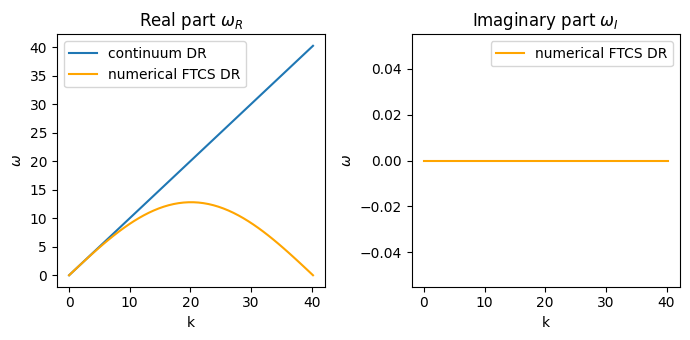

In [21]:
def numerical_DR(k, dx, dt):
    c = 1
    omega = c * np.sin(k*dx) / dx
    return omega

def continuum_DR(k):
    c = 1
    omega = c*k
    return omega

L = 10
M=128
dx = L/M

k = np.linspace(0,np.pi/dx)

w_continuum = continuum_DR(k)
w_numerical = numerical_DR(k, dx, dt = 0.5*dx)

plt.figure(figsize=(7,3.5))
plt.subplot(1,2,1)
plt.title('Real part $\omega_R$')
plt.plot(k,w_continuum, label='continuum DR')
plt.plot(k,w_numerical.real, label='numerical FTCS DR', color='orange')
plt.xlabel('k')
plt.ylabel('$\omega$')
plt.legend()

plt.subplot(1,2,2)
plt.title('Imaginary part $\omega_I$')
plt.plot(k,w_numerical.imag, label='numerical FTCS DR', color='orange')
plt.xlabel('k')
plt.ylabel('$\omega$')
plt.legend()

plt.tight_layout()

l) Let us reflect on what these results are telling us. These results are telling us how wave solutions propagate in the continuum PDE (the true differential equation), and in the numerical discretization of the PDE (using the FTCS method). The propagation of waves is dictated by two properties: $\omega$ and $k$, the oscillation frequency in time and in space; in fact $\omega_R$ is actually what tells us how fast the wave oscillates in time, and $\omega_I$ tells us how fast the amplitude of the wave grows or decays in time. The ratio of $\omega_R/k$ has the dimensions of a speed. It corresponds to the phase speed ($v_\phi \equiv \omega_R/k$) of the wave. Notice how $v_\phi$ is constant (what is this constant?) in the continuum dispersion relation, but not constant in the numerical dispersion relation. Plot the continuum and numerical $v_\phi$ as a function of $k$. Do waves in the numerical method travel faster or slower than waves in the continuum?

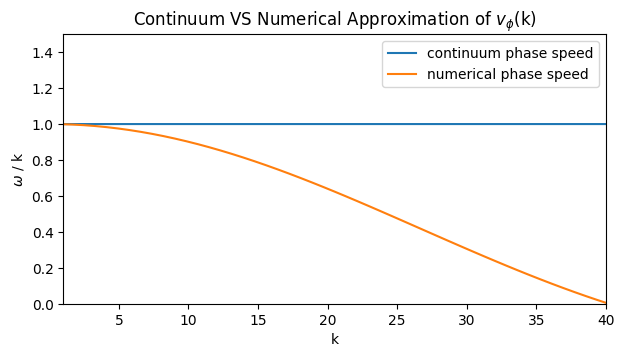

In [22]:
v_continuum = np.divide(w_continuum, k, where=k!=0) #Don't divide by 0
v_numerical = np.divide(w_numerical.real, k, where=k!=0)

plt.figure(figsize=(7,3.5))
plt.title('Continuum VS Numerical Approximation of $v_\phi$(k)')
plt.plot(k,v_continuum, label='continuum phase speed')
plt.plot(k,v_numerical, label='numerical phase speed')
plt.xlabel('k')
plt.ylabel('$\omega$ / k')
plt.ylim(-0.0, 1.5)
plt.xlim(1, 40)
plt.legend()
plt.show()

<div style="background-color: #2a2c2b; color: white; padding: 10px; font-size: 14px;">

As wave number k increases the numerical phase speed decreases, while k is small the agreement is close with the numerical phase speed approaching c. The numerical phase speed is slower than the continuum phase speed, causing the simulated wave to lag behind (it may undergo dispersion, complicating the picture slightly).
 
</div>

m) To get an even better understanding of these dispersion relations and how to interpret them, let us examine the propagation of pure harmonic waves using our numerical method. Let us set $f_0(x) = sin(kx)$, where $k=2\pi/\lambda$ (where $\lambda$ is the wavelength of the wave), and we need to choose $\lambda = L/n$, i.e. $\lambda$ has to fit an integer number of times in the box (because of the imposed periodic boundary conditions). Let us set $\lambda = L/5$ and keep $L=10$ and $M=128$ ($\Delta x = L/M = 10/128$) as we did before.

Integrate the evolution of this wave up to time $T = 4s$ using $\Delta t = 0.5 \Delta x /c$.

Now let us measure two things: 
1) Measure the phase speed of the wave (how fast the peaks/troughs move). Compare with the $v_phi$ calculations from the numerical dispersion relation.
2) Measure the amplification of the amplitude of the wave. Plot the maximum amplitude of the wave as a function time (in a log-linear plot). Compare with the numerical dispersion relation. (Note that the amplitude of the wave will grow as $\exp{\omega_I t}$.)

Continuum phase speed (v_continuum): 1.000
Numerical phase speed (v_phi_numerical): 0.990
Simulation phase speed (v_simulation): 0.000


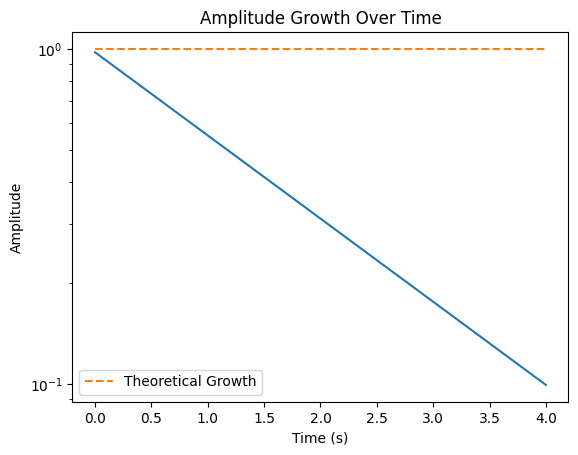

In [52]:
# Set the parameters
L = 10.0
M = 128
dx = L / M
x = np.linspace(0, L, M, endpoint=False)  # endpoint=False ensures periodicity
c = 1.0
T = 4.0
dt = 0.5 * dx/c
lambda_wave = L / 5  # Wavelength
k = 2 * np.pi / lambda_wave  # Wave number

# Calculate numerical dispersion relation omega for the simulation k
omega_numerical = numerical_DR(k, dx, dt)
v_phi_numerical = omega_numerical.real / k  

# Set initial condition: sine wave
x = np.linspace(0, L, M, endpoint=False)
f_0 = np.sin(k * x)

# Initialize variables for simulation
f_n = f_0.copy()
f_np1 = np.zeros_like(f_n)
N_t = int(T / dt)
peak_positions = []  # Initialize as an empty list
amplitudes = []  # Initialize the list to record amplitudes

# Time-stepping loop
for n in range(N_t):
    LaxF_advection(f_np1, f_n, dx, dt)
    f_n, f_np1 = f_np1, f_n
    
    # Record the peak position at each timestep
    peak_positions.append(np.argmax(f_n))

    # Record the maximum amplitude at each timestep
    amplitudes.append(np.max(f_n))

# Convert peak positions to physical space if needed
peak_positions = np.array(peak_positions) * dx
v_simulation = abs((peak_positions[-1] - peak_positions[0]) / T)

# Compare velocities
print(f"Continuum phase speed (v_continuum): {c:.3f}")
print(f"Numerical phase speed (v_phi_numerical): {v_phi_numerical:.3f}")
print(f"Simulation phase speed (v_simulation): {v_simulation:.3f}")

# Measure the amplification of the amplitude
times = np.linspace(0, T, N_t)
plt.figure()
plt.semilogy(times, amplitudes)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Growth Over Time')

# Compare with the numerical dispersion relation
theoretical_amplitude_growth = np.exp(omega_numerical.imag * times)
plt.semilogy(times, theoretical_amplitude_growth, linestyle='--', label='Theoretical Growth')
plt.legend()

plt.show()

n) Repeat the previous question for a smaller wavelength wave, with $\lambda = L/10$. Does this wave travel faster or slower than $\lambda = L/5$? Does it grow faster or slower? Are the numerical results in agreement with the numerical dispersion relation we calculated?

Continuum phase speed (v_continuum): 1.000
Numerical phase speed (v_phi_numerical): 0.960
Simulation phase speed (v_simulation): 1.953


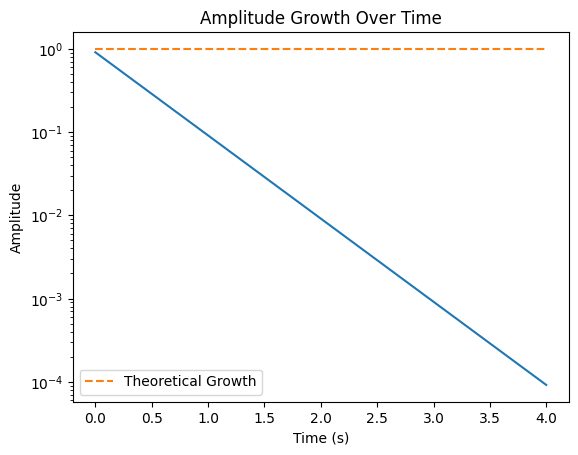

In [51]:
# Set the parameters
L = 10.0
M = 128
dx = L / M
x = np.linspace(0, L, M, endpoint=False)  # endpoint=False ensures periodicity
c = 1.0
T = 4.0
dt = 0.5 * dx/c
lambda_wave = L / 10  # Wavelength
k = 2 * np.pi / lambda_wave  # Wave number

# Calculate numerical dispersion relation omega for the simulation k
omega_numerical = numerical_DR(k, dx, dt)
v_phi_numerical = omega_numerical.real / k  

# Set initial condition: sine wave
x = np.linspace(0, L, M, endpoint=False)
f_0 = np.sin(k * x)

# Initialize variables for simulation
f_n = f_0.copy()
f_np1 = np.zeros_like(f_n)
N_t = int(T / dt)
peak_positions = []  # Initialize as an empty list
amplitudes = []  # Initialize the list to record amplitudes

# Time-stepping loop
for n in range(N_t):
    LaxF_advection(f_np1, f_n, dx, dt)
    f_n, f_np1 = f_np1, f_n
    
    # Record the peak position at each timestep
    peak_positions.append(np.argmax(f_n))

    # Record the maximum amplitude at each timestep
    amplitudes.append(np.max(f_n))

# Convert peak positions to physical space if needed
peak_positions = np.array(peak_positions) * dx
v_simulation = abs((peak_positions[-1] - peak_positions[0]) / T)

# Compare velocities
print(f"Continuum phase speed (v_continuum): {c:.3f}")
print(f"Numerical phase speed (v_phi_numerical): {v_phi_numerical:.3f}")
print(f"Simulation phase speed (v_simulation): {v_simulation:.3f}")

# Measure the amplification of the amplitude
times = np.linspace(0, T, N_t)
plt.figure()
plt.semilogy(times, amplitudes)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Growth Over Time')

# Compare with the numerical dispersion relation
theoretical_amplitude_growth = np.exp(omega_numerical.imag * times)
plt.semilogy(times, theoretical_amplitude_growth, linestyle='--', label='Theoretical Growth')
plt.legend()

plt.show()

o) Repeat the previous question using a smaller value of $\Delta t$ (e.g. half of $\Delta t$ used previously). Are the numerical results in agreement with the numerical dispersion relation we calculated?

Continuum phase speed (v_continuum): 1.000
Numerical phase speed (v_phi_numerical): 0.960
Simulation phase speed (v_simulation): 1.426


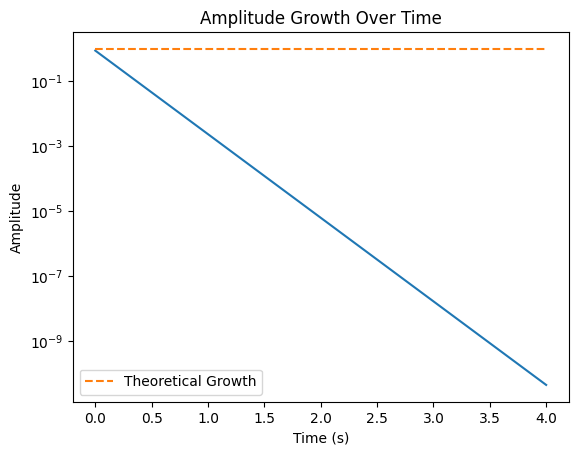

In [50]:
# Set the parameters
L = 10.0
M = 128
dx = L / M
x = np.linspace(0, L, M, endpoint=False)  # endpoint=False ensures periodicity
c = 1.0
T = 4.0
dt = 0.25 * dx/c
lambda_wave = L / 10  # Wavelength
k = 2 * np.pi / lambda_wave  # Wave number

# Calculate numerical dispersion relation omega for the simulation k
omega_numerical = numerical_DR(k, dx, dt)
v_phi_numerical = omega_numerical.real / k  

# Set initial condition: sine wave
x = np.linspace(0, L, M, endpoint=False)
f_0 = np.sin(k * x)

# Initialize variables for simulation
f_n = f_0.copy()
f_np1 = np.zeros_like(f_n)
N_t = int(T / dt)
peak_positions = []  # Initialize as an empty list
amplitudes = []  # Initialize the list to record amplitudes

# Time-stepping loop
for n in range(N_t):
    LaxF_advection(f_np1, f_n, dx, dt)
    f_n, f_np1 = f_np1, f_n
    
    # Record the peak position at each timestep
    peak_positions.append(np.argmax(f_n))

    # Record the maximum amplitude at each timestep
    amplitudes.append(np.max(f_n))

# Convert peak positions to physical space if needed
peak_positions = np.array(peak_positions) * dx
v_simulation = abs((peak_positions[-1] - peak_positions[0]) / T)

# Compare velocities
print(f"Continuum phase speed (v_continuum): {c:.3f}")
print(f"Numerical phase speed (v_phi_numerical): {v_phi_numerical:.3f}")
print(f"Simulation phase speed (v_simulation): {v_simulation:.3f}")

# Measure the amplification of the amplitude
times = np.linspace(0, T, N_t)
plt.figure()
plt.semilogy(times, amplitudes)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Growth Over Time')

# Compare with the numerical dispersion relation
theoretical_amplitude_growth = np.exp(omega_numerical.imag * times)
plt.semilogy(times, theoretical_amplitude_growth, linestyle='--', label='Theoretical Growth')
plt.legend()

plt.show()

### Reflection
Let us reflect on why the numerical solutions we found in question e) looked the way they looked, i.e. why those distortions in the gaussian pulse appeared. Fourier analysis tells us that any function can be represented as a superposition of many elementary waves (sines and cosines of different frequencies). The gaussian pulse we used in the examples indeed are made up of many sine and cosine waves (you can check this via a Fourier Transform of the gaussian pulse). In the continuum limit, all these waves travel at the same velocity ($v_\phi = \omega/k =$ constant), and thus the gaussian pulse preserves it shape over time, because all the sines and cosines preserve their relative phase with respect to one another. In the numerical calculation however, sines and cosines of different frequencies $k$ travel at different speeds. This means that the sines and cosines that make up the gaussian pulse will begin to separate over time (they will begin to disperse! Hence the name "numerical dispersion"). In particular you see that the waves in the numerical calculation travel slower than in the continuum limit, so they start to lag behind. This is why we see the formation of some wiggles in the back of the pulse (these are slower waves falling behind), and this results in the distortion of the numerical solutions over times.

### Bonus question:

Make a copy this notebook and repeat each exercise for the case of the Lax-Friedrichs method instead of the FTCS method. See how the properties of the numerical solutions change.